In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\\Data Science\\assignments\\ToyotaCorolla - MLR.csv")
# Display first few rows
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [2]:
# Check shape and data types
print("\nDataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)


Dataset Shape: (1436, 11)

Data Types:
 Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [3]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [4]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min 

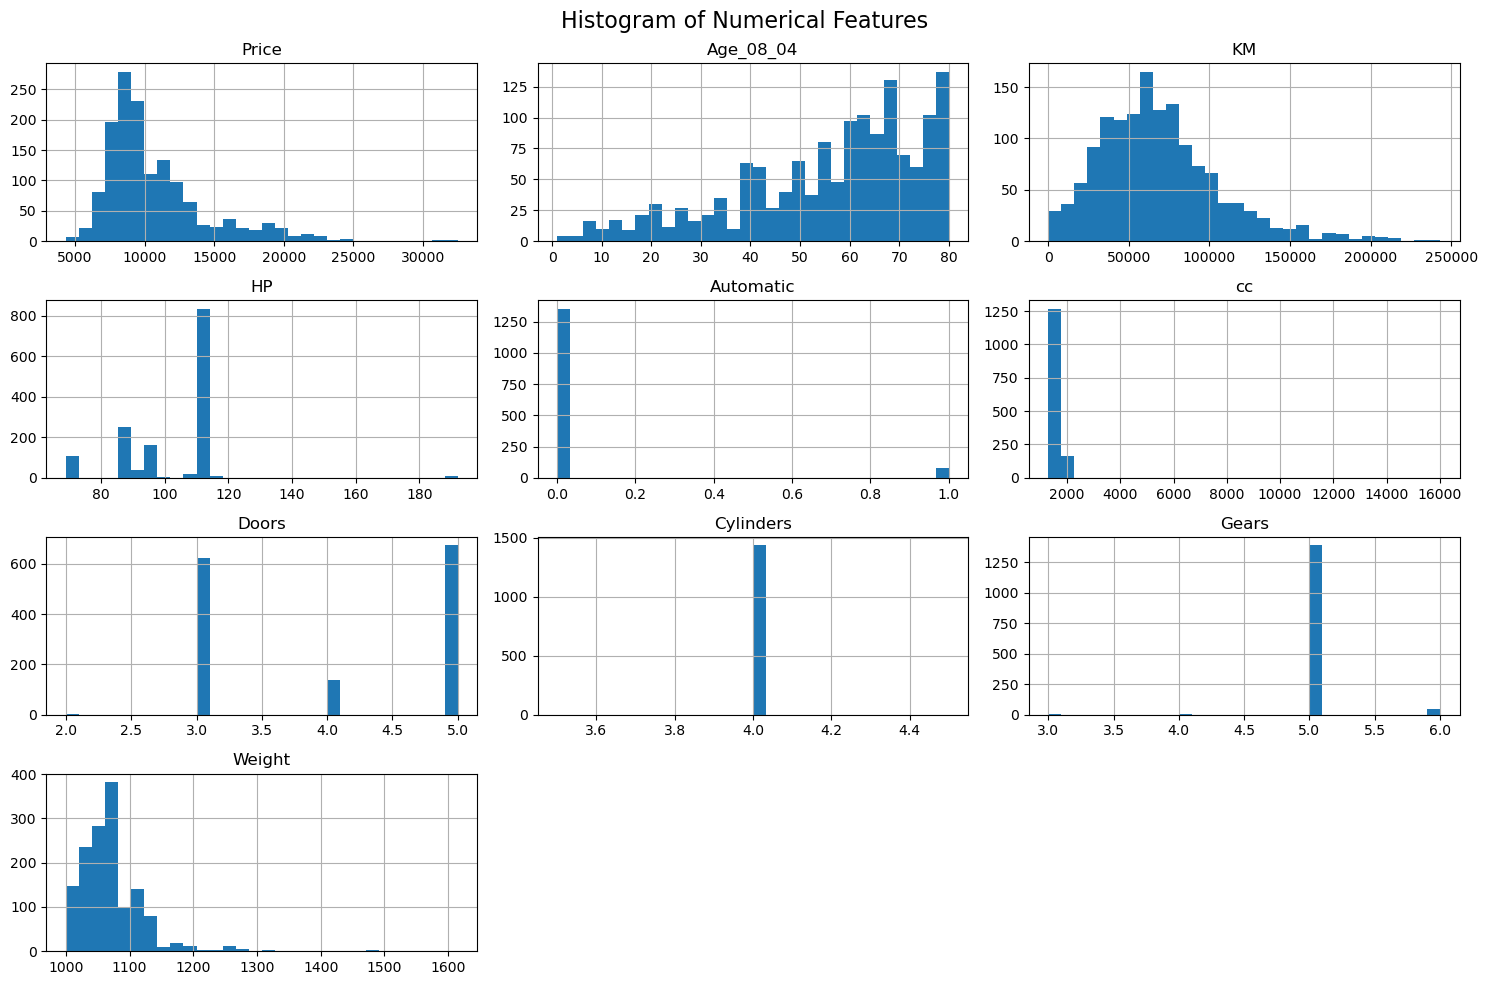

In [5]:
# Visualizations
# Histogram for numerical features
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

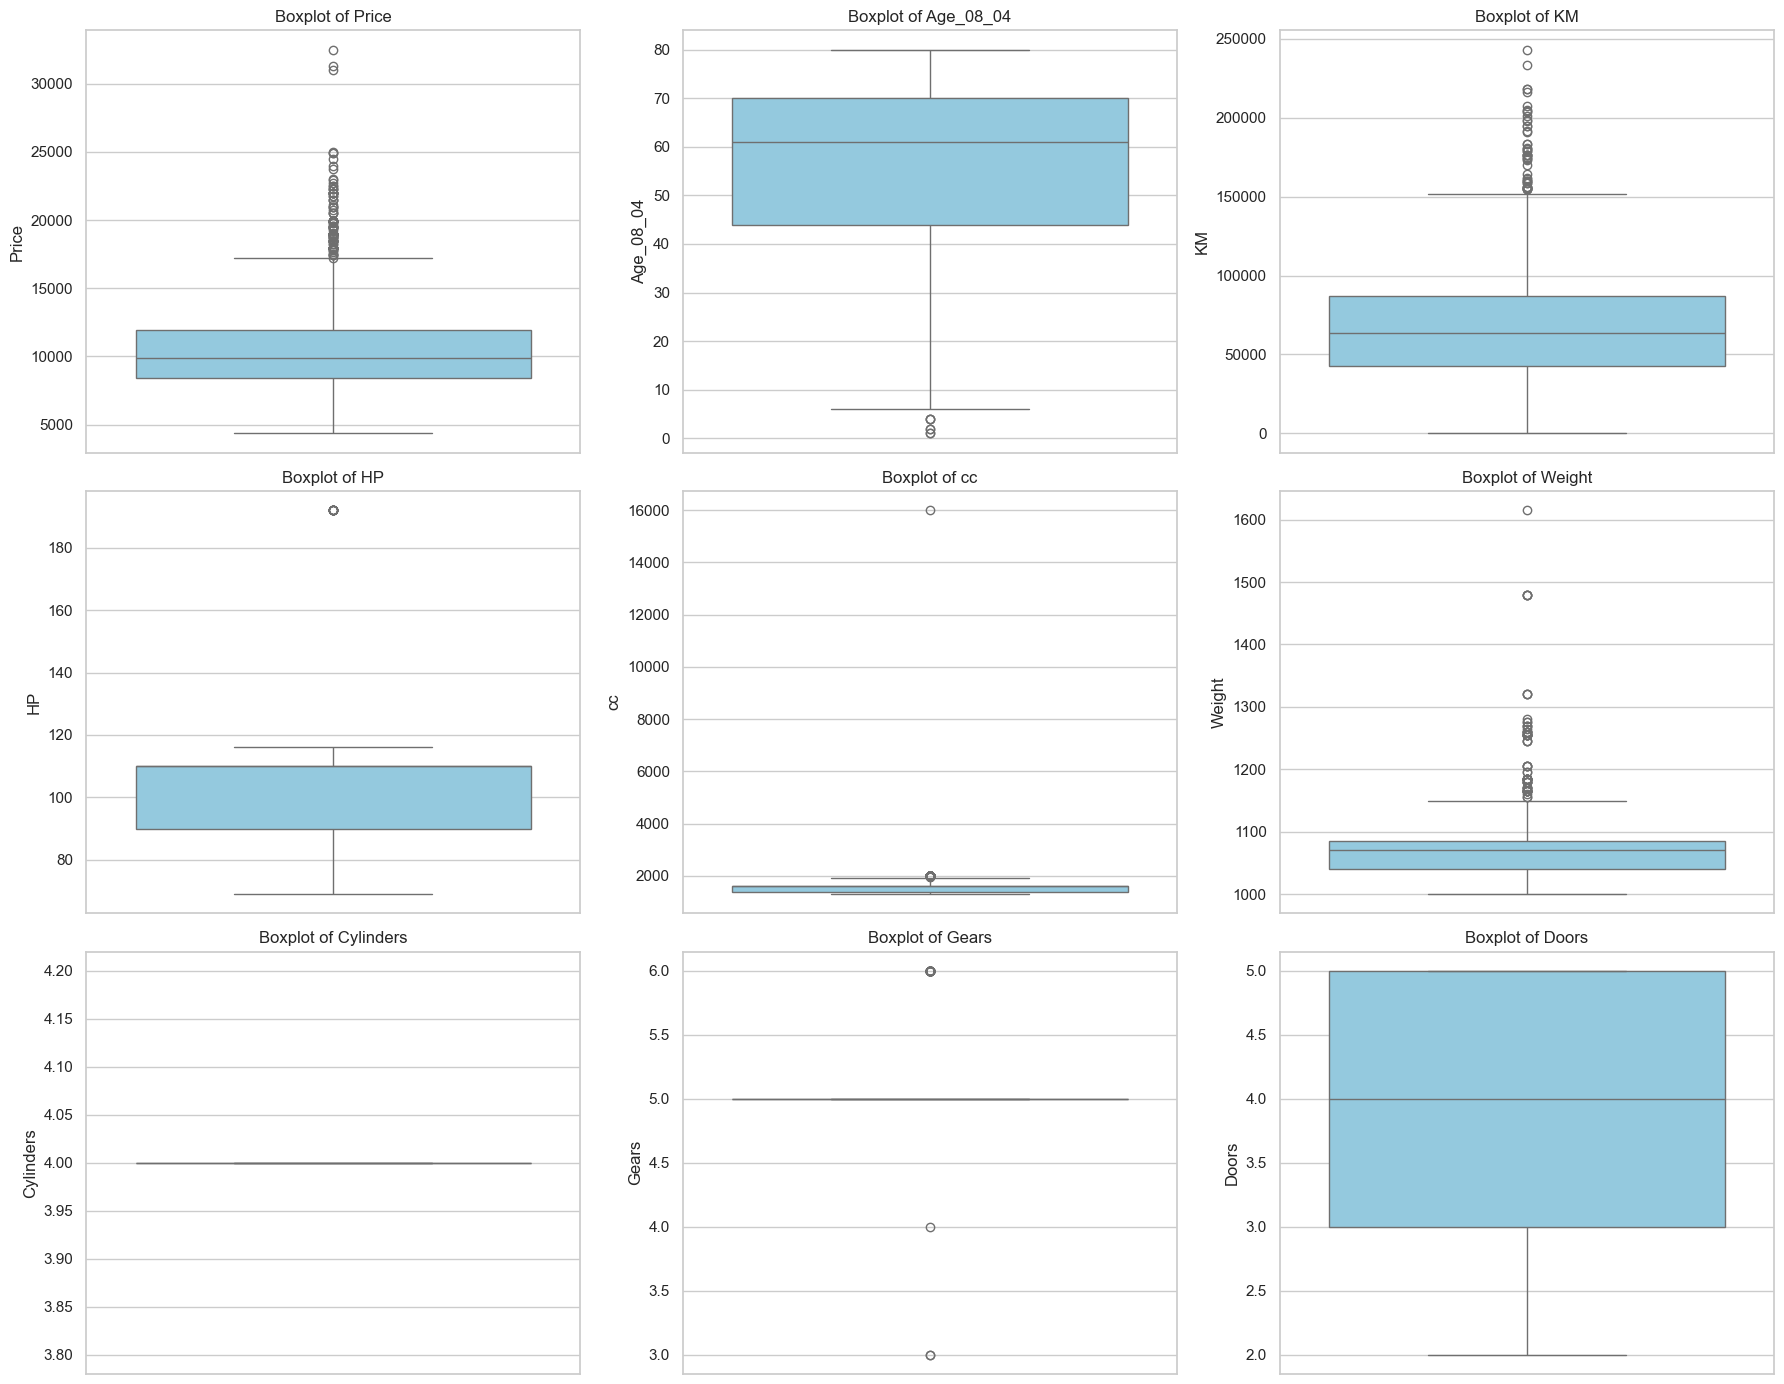

In [6]:
# Boxplots
# Define numerical columns for boxplot visualization
numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Cylinders', 'Gears', 'Doors']

# Set plot style
sns.set(style="whitegrid")

# Plot boxplots for each numerical column
plt.figure(figsize=(18, 14))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns layout
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


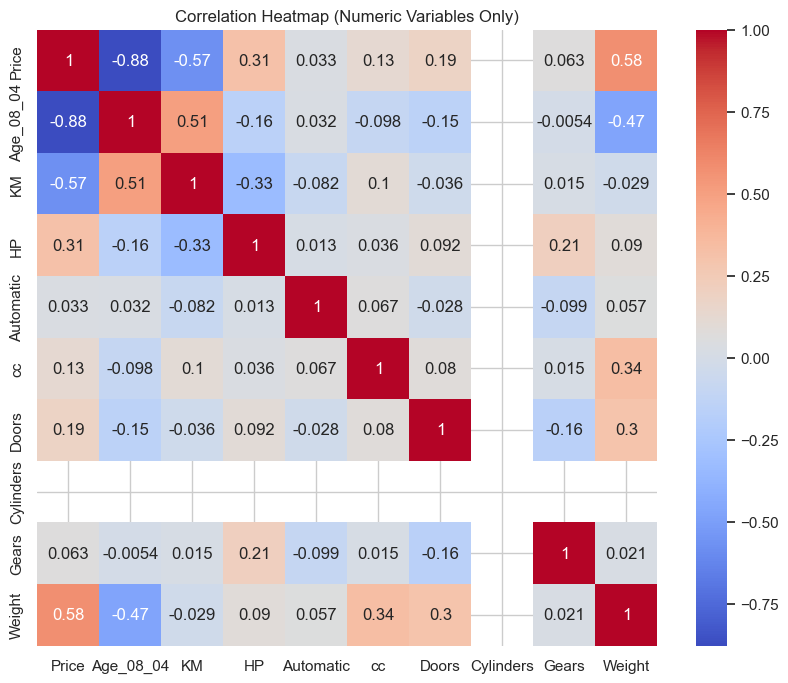

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

In [8]:
# Data Preprocessing
# Handle Categorical Variables

# One-hot encode 'FuelType' (drop_first=True to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [9]:
# Outlier removal using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to numerical columns only (exclude binary or encoded)
numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Cylinders', 'Gears']
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

In [10]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,23,71138,69,0,1900,3,4,5,1105,True,False
18,16750,24,25563,110,0,1600,3,4,5,1065,False,True
19,16950,30,64359,110,0,1600,3,4,5,1105,False,True
20,15950,30,67660,110,0,1600,3,4,5,1105,False,True
22,15950,28,56349,110,0,1600,3,4,5,1120,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [11]:
# Separate input features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,23,71138,69,0,1900,3,4,5,1105,True,False
18,16750,24,25563,110,0,1600,3,4,5,1065,False,True
19,16950,30,64359,110,0,1600,3,4,5,1105,False,True
20,15950,30,67660,110,0,1600,3,4,5,1105,False,True
22,15950,28,56349,110,0,1600,3,4,5,1120,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [12]:
# Feature Scaling (standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Cylinders', 'Gears', 'Doors']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [13]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
9,12950,-2.391366,0.202249,-3.210571,0,2.893082,-1.078821,0.0,0.0,1.775691,True,False
18,16750,-2.325446,-1.459754,0.692582,0,0.642159,-1.078821,0.0,0.0,0.316577,False,True
19,16950,-1.929927,-0.044963,0.692582,0,0.642159,-1.078821,0.0,0.0,1.775691,False,True
20,15950,-1.929927,0.075416,0.692582,0,0.642159,-1.078821,0.0,0.0,1.775691,False,True
22,15950,-2.061766,-0.337068,0.692582,0,0.642159,-1.078821,0.0,0.0,2.322859,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.640948,-1.642784,-1.592190,0,-1.608765,-1.078821,0.0,0.0,-1.142538,False,True
1432,10845,0.838708,-1.699090,-1.592190,0,-1.608765,-1.078821,0.0,0.0,-1.507316,False,True
1433,8500,0.772788,-1.771441,-1.592190,0,-1.608765,-1.078821,0.0,0.0,-1.507316,False,True
1434,7250,0.706868,-1.775088,-1.592190,0,-1.608765,-1.078821,0.0,0.0,-1.507316,False,True


In [14]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model building using three different models

# Model 1:  Multiple Linear Regression using all variables
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression().fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate the performance of the model on the testing dataset
from sklearn.metrics import mean_squared_error, r2_score

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
# Print R2 scores
print("R² Score:")
print(f"Linear Regression: {r2_lr:.4f}")
# Print RMSE values
print("\nRMSE Value:")
print(f"Linear Regression: {rmse_lr:.4f}")

R² Score:
Linear Regression: 0.7702

RMSE Value:
Linear Regression: 1091.4423


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
# Model 2:  Using Top Correlated Features

print("Model 2: Linear Regression with Top Correlated Features")

top_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X2 = df[top_features]
y2 = df['Price']

# Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train
model2 = LinearRegression().fit(X2_train, y2_train)

# Predict
y2_pred = model2.predict(X2_test)

# Evaluate the performance of the model on the testing dataset
r2_model2 = r2_score(y2_test, y2_pred)
rmse_model2 = mean_squared_error(y2_test, y2_pred, squared=False)

print(f"\nR² Score (Model 2): {r2_model2:.4f}")
print(f"RMSE (Model 2):     {rmse_model2:.4f}")

Model 2: Linear Regression with Top Correlated Features

R² Score (Model 2): 0.7783
RMSE (Model 2):     1072.0481


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Model 3: After Removing High VIF Columns
"""
Variance Inflation Factor (VIF) for each feature:

     Feature       VIF
0  Age_08_04  1.616084
1         KM  1.415552
2  Fuel_Type  1.380851
3         HP  3.031422
4  Automatic  1.126300
5         cc  3.602107
6      Doors  1.519099
7  Cylinders  0.000000
8      Gears  0.000000
9     Weight  2.796301

"""
print("Model 3: Linear Regression after Removing High VIF Features")

# Create X3 by dropping high/zero VIF columns for this model ONLY
X3 = df.drop(['Price', 'cc', 'Cylinders', 'Gears'], axis=1).copy()
y3 = df['Price']

# Split data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train linear regression model
model3 = LinearRegression().fit(X3_train, y3_train)

# Predict
y_pred3 = model3.predict(X3_test)

# Evaluate the performance of the model on the testing dataset
r2_model3 = r2_score(y3_test, y3_pred)
rmse_model3 = mean_squared_error(y3_test, y3_pred, squared=False)

# Output
print(f"\nR² Score (Model 3): {r2_model3:.4f}")
print(f"RMSE (Model 3):     {rmse_model3:.4f}")


Model 3: Linear Regression after Removing High VIF Features

R² Score (Model 3): 0.7710
RMSE (Model 3):     1089.4068


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Display intercept and coefficients

print("Intercept:", lr.intercept_)
print("\nCoefficients:")
for feature, coef in zip(X_train.columns, lr.coef_):
    print(f"{feature}: {coef:.4f}")


Intercept: -8714.483348869237

Coefficients:
Age_08_04: -114.2471
KM: -0.0132
HP: -171.2236
Automatic: 1.8621
cc: 12.9576
Doors: -94.5143
Cylinders: -0.0000
Gears: 0.0000
Weight: 22.3473
Fuel_Type_Diesel: -12048.3887
Fuel_Type_Petrol: 1260.8327


In [39]:
# Using Lasso Method

# Train model
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
# Predict
y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Print R2 score
print("R² Score:")
print(f"Lasso Regression:  {r2_lasso:.4f}")
# Print RMSE value
print("\nRMSE Value:")
print(f"Lasso Regression:  {rmse_lasso:.4f}")

R² Score:
Lasso Regression:  0.7729

RMSE Value:
Lasso Regression:  1084.8613


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.289e+08, tolerance: 4.786e+05
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
# Using Ridge Method

# Train model
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
# Predict
y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Print R2 score
print("R² Score:")
print(f"Ridge Regression:  {r2_ridge:.4f}")

# Print RMSE value
print("\nRMSE Value:")
print(f"Ridge Regression:  {rmse_ridge:.4f}")


R² Score:
Ridge Regression:  0.7715

RMSE Value:
Ridge Regression:  1088.1957


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
"""
Interview Questions:

1. What is Normalization & Standardization and how is it helpful?

Normalization:
It rescales the data to a fixed range (usually 0 to 1).

When to Use:
-> When your data doesn’t follow a Gaussian (normal) distribution.
-> Commonly used in KNN, neural networks, and distance-based algorithms.

Standardization:
It transforms the data to have zero mean and unit variance (i.e., mean = 0, std = 1).

When to Use:
-> When data follows a normal distribution.
-> Preferred in linear models like Linear Regression, Logistic Regression, SVM, etc.

Why is it helpful?
-> Ensures all features contribute equally (prevents features with larger scales from dominating).
-> Improves convergence of gradient descent algorithms.
-> Helps in regularization (Ridge, Lasso), where coefficients are sensitive to scale.
-> Essential for models where distance or dot products are computed.


2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity:
-> It occurs when two or more independent variables are highly correlated.
-> This makes it difficult to determine the individual effect of each predictor on the target.

It can be detected by using Variance Inflation Factor (VIF).
If VIF > 5 or 10, it indicates multicollinearity.

Techniques to Address It:

a. Remove one of the correlated variables
E.g., if HP and cc are highly correlated, keep only one.

b. Combine correlated features
E.g., create an average or ratio of two correlated features.

c. Use Dimensionality Reduction
Principal Component Analysis (PCA) can transform correlated variables into a set of uncorrelated components.

d. Regularization Methods
Ridge Regression (L2): Shrinks coefficients to reduce the effect of multicollinearity.
Lasso Regression (L1): Can shrink some coefficients to zero (also helps in feature selection).

"""